In [5]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy.spatial import ConvexHull
import k3d

In [4]:
!pip install k3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 460.0 kB/s eta 0:00:000:00:01m eta 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 986.0 kB/s eta 0:00:001m978.3 kB/s eta 0:00:01


In [6]:
def read_binary_stl(filename):
    with open(filename, "rb") as f:
        # 80バイトのヘッダーをスキップ
        header = f.read(80)
        print("Header:", header.decode(errors="ignore"))

        # 4バイトの三角形数を取得
        num_triangles = struct.unpack("<I", f.read(4))[0]
        print("Number of triangles:", num_triangles)

        triangles = []

        for _ in range(num_triangles):
            # 1つの三角形のデータ（50バイト）
            data = f.read(50)

            # 法線ベクトル (3 x float32)
            normal = struct.unpack("<fff", data[0:12])

            # 3つの頂点座標 (3 x (3 x float32))
            v1 = struct.unpack("<fff", data[12:24])
            v2 = struct.unpack("<fff", data[24:36])
            v3 = struct.unpack("<fff", data[36:48])

            # 2バイトの属性バイト数（無視する）
            attr_byte_count = struct.unpack("<H", data[48:50])[0]

            triangles.append((normal, v1, v2, v3))

        return triangles

# 例：STLファイルを読み込んで表示
stl_file = "your_file.stl"
triangles = read_binary_stl(stl_file)

xs = np.array([])
ys = np.array([])
zs = np.array([])
if triangles:
    for t in triangles:
        print ("Triangle #", triangles.index(t))
        print("  Normal:", t[0])
        print("  Vertex 1:", t[1])
        print("  Vertex 2:", t[2])
        print("  Vertex 3:", t[3])
        # pdb.set_trace()
        xs = np.append(xs,t[0][0])
        xs = np.append(xs,t[0][1])
        xs = np.append(xs,t[0][2])
        ys = np.append(ys,t[1][0])
        ys = np.append(ys,t[1][1])
        ys = np.append(ys,t[1][2])
        zs = np.append(zs,t[2][0])
        zs = np.append(zs,t[2][1])
        zs = np.append(zs,t[2][2])



Header: STLB ATF 13.20.0.188 COLOR=                                                 
Number of triangles: 692
Triangle # 0
  Normal: (0.0, 1.0, 0.0)
  Vertex 1: (10.0, 30.0, 15.0)
  Vertex 2: (7.5, 30.0, 8.75)
  Vertex 3: (-10.0, 30.0, 15.0)
Triangle # 1
  Normal: (0.0, 1.0, 0.0)
  Vertex 1: (-10.0, 30.0, 15.0)
  Vertex 2: (7.5, 30.0, 8.75)
  Vertex 3: (-7.5, 30.0, 8.75)
Triangle # 2
  Normal: (-0.0, 1.0, 0.0)
  Vertex 1: (-7.5, 30.0, 8.75)
  Vertex 2: (7.5, 30.0, 8.75)
  Vertex 3: (6.25, 30.0, 5.625)
Triangle # 3
  Normal: (0.0, 1.0, 0.0)
  Vertex 1: (-7.5, 30.0, 8.75)
  Vertex 2: (6.25, 30.0, 5.625)
  Vertex 3: (-6.25, 30.0, 5.625)
Triangle # 4
  Normal: (-0.0, 1.0, 0.0)
  Vertex 1: (-6.25, 30.0, 5.625)
  Vertex 2: (6.25, 30.0, 5.625)
  Vertex 3: (5.0, 30.0, 2.5)
Triangle # 5
  Normal: (0.0, 1.0, 0.0)
  Vertex 1: (-6.25, 30.0, 5.625)
  Vertex 2: (5.0, 30.0, 2.5)
  Vertex 3: (-5.0, 30.0, 2.5)
Triangle # 6
  Normal: (-0.0, 1.0, 0.0)
  Vertex 1: (-5.0, 30.0, 2.5)
  Vertex 2: (5.0, 30.0,

In [55]:
z_points = np.linspace(zs.min(),zs.max(),10) 
xy_dict = {}
for zp in z_points:
    points = np.array([])
    for t in triangles:
        first = t[0]
        second = t[1]
        third = t[2]
        x1 = first[0]
        x2 = second[0]
        x3 = third[0]
        y1 = first[1]
        y2 = second[1]
        y3 = third[1]
        z1 = first[2]
        z2 = second[2]
        z3 = third[2]
        if zp > z1 and zp < z2:
            k = (zp-z1)/(z2-zp)
            x = 1/(1+k)*x1 + k/(1+k)*x2
            y = 1/(1+k)*y1 + k/(1+k)*y2
            # x = x1 + (x2 - x1) * (zp - z1) / (z2 - z1)
            # y = y1 + (y2 - y1) * (zp - z1) / (z2 - z1)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z2 and zp < z3:
            k = (zp-z2)/(z3-zp)
            x = 1/(1+k)*x2 + k/(1+k)*x3
            y = 1/(1+k)*y2 + k/(1+k)*y3
            # x = x2 + (x3 - x2) * (zp - z2) / (z3 - z2)
            # y = y2 + (y3 - y2) * (zp - z2) / (z3 - z2)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z3 and zp < z1:
            k = (zp-z3)/(z1-zp)
            x = 1/(1+k)*x3 + k/(1+k)*x1
            y = 1/(1+k)*y3 + k/(1+k)*y1
            # x = x3 + (x1 - x3) * (zp - z3) / (z1 - z3)
            # y = y3 + (y1 - y3) * (zp - z3) / (z1 - z3)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z2 and zp < z1:
            k = (zp-z2)/(z1-zp)
            x = 1/(1+k)*x2 + k/(1+k)*x1
            y = 1/(1+k)*y2 + k/(1+k)*y1
            # x = x2 + (x1 - x2) * (zp - z2) / (z1 - z2)
            # y = y2 + (y1 - y2) * (zp - z2) / (z1 - z2)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z3 and zp < z2:
            k = (zp-z3)/(z2-zp)
            x = 1/(1+k)*x3 + k/(1+k)*x2
            y = 1/(1+k)*y3 + k/(1+k)*y2
            # x = x3 + (x2 - x3) * (zp - z3) / (z2 - z3)
            # y = y3 + (y2 - y3) * (zp - z3) / (z2 - z3)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp > z1 and zp < z3:
            k = (zp-z1)/(z3-zp)
            x = 1/(1+k)*x1 + k/(1+k)*x3
            y = 1/(1+k)*y1 + k/(1+k)*y3
            # x = x1 + (x3 - x1) * (zp - z1) / (z3 - z1)
            # y = y1 + (y3 - y1) * (zp - z1) / (z3 - z1)
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp == z1:
            x = x1
            y = y1
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp == z2:
            x = x2
            y = y2
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
        elif zp == z3:
            x = x3
            y = y3
            if points.size == 0:
                points = np.append(points,np.array([x,y]))
            else:
                points = np.vstack([points,np.array([x,y])])
            # plt.plot(x,y,'ro')
            # print("x:", x, "y:", y, "z:", zp)
    xy_dict[zp] = points

xy_dict

{-25.0: array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]),
 -18.88888888888889: array([[-0.2178082 ,  0.05372603],
        [-0.21693844,  0.0553645 ],
        [-2.96358859,  0.36036036],
        [-0.09952947,  6.67436835],
        [-0.09952947,  6.67436835],
        [-1.40759449,  3.51670141],
        [ 0.64773845,  9.50589971],
        [ 1.1468254 ,  7.5       ],
        [ 1.35416667,  6.66666667],
        [ 1.8037119 ,  4.85988201],
        [ 1.40740674,  3.51677552],
        [ 1.40753281,  3.51701201],
        [ 0.09931188,  6.67387165]]),
 -12.777777777777779: array([[-5.83333333,  0.        ],
        [-2.12962963, -0.31851852],
        [-0.43561641,  0.10745205],
        [-0.43387688,  0.110729  ],
        [-2.39106604,  0.07343008],
        [-2.39106604,  0.07343008],
        [-3.94797139,  3.35502039],
        [-3.9483527 ,  3.35552744],
        [-3.91811684,  7.34485229],
        [-3.91820158,  7.34500088],
        [-3.14636752, 11.25      ],
        [-2.

-25.0
-18.88888888888889
-12.777777777777779
-6.666666666666668
-0.5555555555555571
5.555555555555554
11.666666666666664
17.77777777777777
23.888888888888886
30.0


<Figure size 640x480 with 0 Axes>

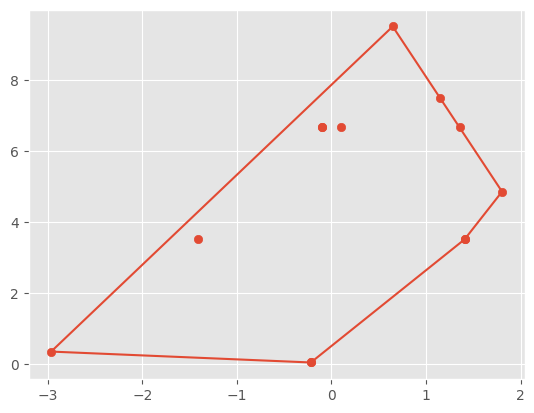

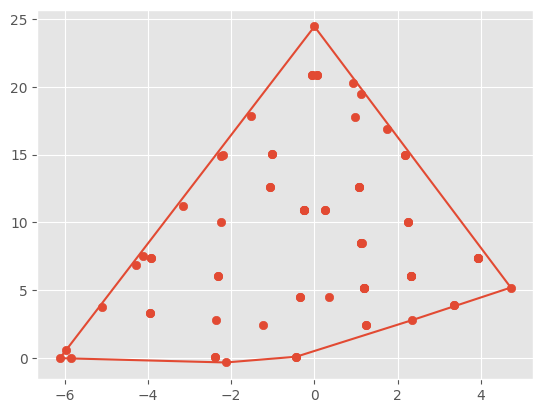

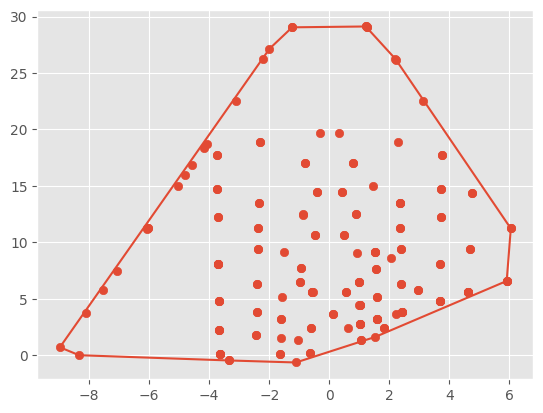

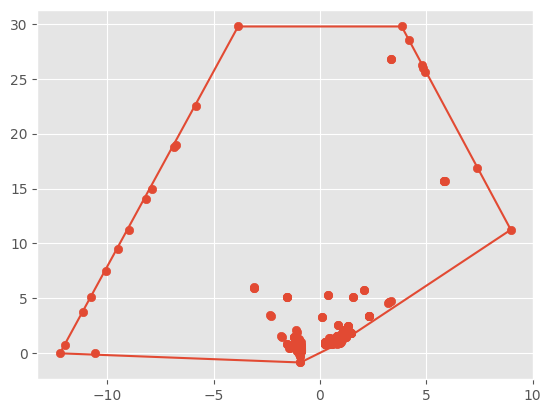

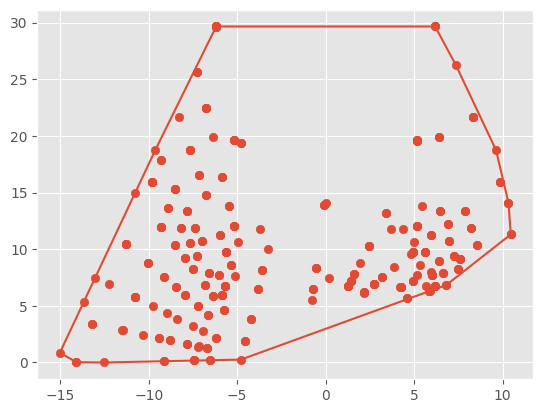

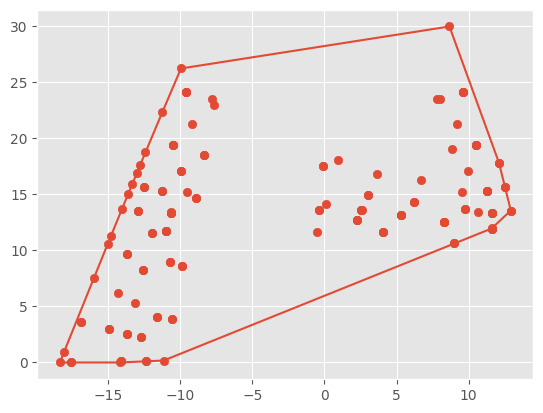

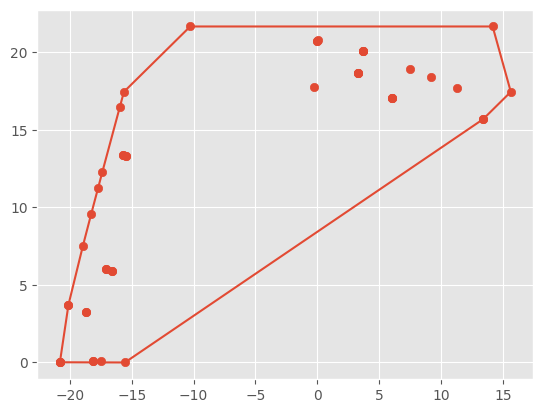

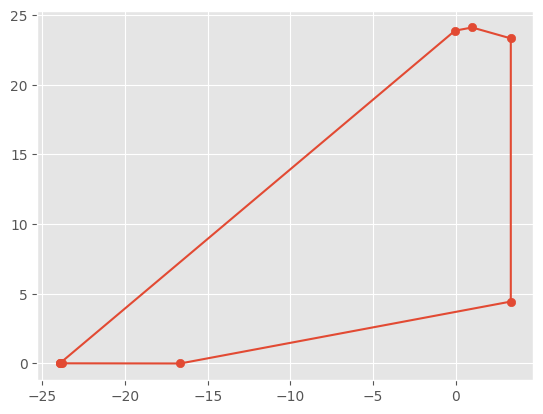

<Figure size 640x480 with 0 Axes>

In [85]:
for zp in z_points:
    plt.figure()
    xy_points = xy_dict[zp]
    print(zp)
    try:
        hull = ConvexHull(xy_points)
        points = hull.points
        hull_points = points[hull.vertices]
        hp = np.vstack((hull_points, hull_points[0]))
        plt.plot(hp[:,0], hp[:,1])
        plt.scatter(points[:,0], points[:,1])
        # print(hull)
    except Exception:
        pass
plt.show()       